<a href="https://colab.research.google.com/github/MK316/Spring2024/blob/main/Corpus/LD-measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌿 Topics:

## 1. Type vs. Token
## 2. Lexical Diversity measures (10 types)

# 🌀 Part 1. Type vs. Token

+ Tokens: A token is an instance of a sequence of characters in a text that are grouped together as a useful semantic unit for processing. Tokens are often words, but they can also include punctuation, numbers, and other characters depending on the analysis. Essentially, a token is an individual piece of the text.

  + Example: In the sentence "The cat sat on the mat," there are six tokens: 'The', 'cat', 'sat', 'on', 'the', 'mat'.

+ Types: A type is the unique form of a token, disregarding its frequency of occurrence. Types are essentially the distinct words or characters in a text. Counting types involves counting each unique token once, no matter how many times it appears in the text.

  + Example: In the sentence "The cat sat on the mat," there are five types: 'The', 'cat', 'sat', 'on', 'mat'. Note that 'The' and 'the' are counted as different types if case sensitivity is maintained, and 'the' is only counted once despite appearing twice as a token.

## Read data file from Github, Add string length, Number of splitted words (N_Splits)

data: https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/ksatdata_12only.csv (12 only, Q41 removed)

In [2]:
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/MK316/Workingpapers/main/Analysis/mydata01.csv'
df1 = pd.read_csv(url)

In [ ]:
# df1.to_csv('/content/mydata.csv', sep=',', na_rep='NaN')
# import chardet
# with open('/content/ksatdata_item17.csv', 'rb') as f:
#   enc = chardet.detect(f.read())
# df1 = pd.read_csv('/content/ksatdata_item17.csv', encoding=enc['encoding'])

In [4]:
df1

,Year,Category,QN,Passage
0,2015,Context,Q18,One difference between winners and losers is h...
1,2015,Context,Q19,"As I walked to the train station, I felt the w..."
2,2015,Context,Q20,Many disciplines are better learned by enterin...
3,2015,Context,Q21,The most normal and competent child encounters...
4,2015,Context,Q22,The most normal and competent child encounters...
...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ..."
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...


# Adding a colum with length info

In [5]:
df2 = df1

In [6]:
# Added column: String length
length = []

for i in range(0, len(df2['Passage'])):
  LEN = len(df2['Passage'][i])
  length.append(LEN)

df2['String'] = length
df2

,Year,Category,QN,Passage,String
0,2015,Context,Q18,One difference between winners and losers is h...,635
1,2015,Context,Q19,"As I walked to the train station, I felt the w...",628
2,2015,Context,Q20,Many disciplines are better learned by enterin...,715
3,2015,Context,Q21,The most normal and competent child encounters...,737
4,2015,Context,Q22,The most normal and competent child encounters...,724
...,...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",1035
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,1025
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,981
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,1068


In [7]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df2['Passage'])):
  TSP = df2['Passage'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df2['Splits'] = tsplit
df2['N_Splits'] = splen
df2

,Year,Category,QN,Passage,String,Splits,N_Splits
0,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107
1,2015,Context,Q19,"As I walked to the train station, I felt the w...",628,"[As, I, walked, to, the, train, station,, I, f...",123
2,2015,Context,Q20,Many disciplines are better learned by enterin...,715,"[Many, disciplines, are, better, learned, by, ...",117
3,2015,Context,Q21,The most normal and competent child encounters...,737,"[The, most, normal, and, competent, child, enc...",128
4,2015,Context,Q22,The most normal and competent child encounters...,724,"[The, most, normal, and, competent, child, enc...",128
...,...,...,...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",1035,"[According, to, the, market, response, model,,...",163
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,1025,"[In, spite, of, the, likeness, between, the, f...",167
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,981,"[Retraining, current, employees, for, new, pos...",155
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,1068,"[As, long, as, the, irrealism, of, the, silent...",174


## Histogram to check the word length

data: df2

In [8]:
import matplotlib.pyplot as plt

In [9]:
df2.describe()

,Year,String,N_Splits
count,136.000000,136.000000,136.000000
mean,2018.500000,928.669118,152.191176
std,2.299758,150.532933,20.197732
min,2015.000000,575.000000,105.000000
25%,2016.750000,823.250000,136.000000
50%,2018.500000,955.500000,155.500000
75%,2020.250000,1047.250000,167.000000
max,2022.000000,1264.000000,195.000000


(array([ 7.,  6., 10., 12., 20., 22., 28., 16., 13.,  2.]),
 array([105., 114., 123., 132., 141., 150., 159., 168., 177., 186., 195.]),
 <BarContainer object of 10 artists>)

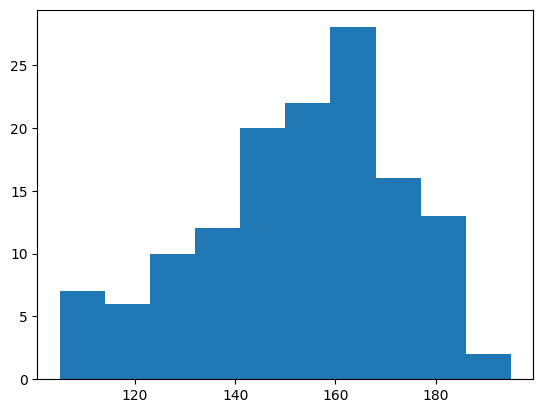

In [10]:
plt.hist(df2['N_Splits'])

---
#🌀 Part II. Lexical Diversity Indices (10 types)
---

## Getting LD indices

+ **TTR (Type-Token Ratio)**: Measures the ratio of the number of unique words (types) to the total number of words (tokens) in a text, indicating vocabulary diversity. *Reference: (Richards, 1987)*

+ **RTTR (Root Type-Token Ratio)**: An adaptation of TTR that takes the square root of the number of tokens to reduce the impact of text length. *Reference: (Guiraud, 1954)*

+ **LogTTR (Logarithmic Type-Token Ratio)**: A measure that involves taking the logarithm of the number of types and dividing it by the logarithm of the number of tokens. *Reference: (Herdan, 1960)*

+ **MassTTR**: A lexical diversity measure accounting for the number of different words in large segments of the text. *Reference: (Covington & McFall, 2010)*

+ **MSTTR (Mean Segmental Type-Token Ratio)**: Calculates TTR for multiple segments of a given length within the text and averages the results. *Reference: (Johnson, 1944)*

+ **MATTR (Moving-Average Type-Token Ratio)**: A measure that calculates TTR over a moving window, averaging the TTR values across the text. *Reference: (Covington & McFall, 2010)*

+ **HDD (Hypergeometric Distribution D)**: Estimates the probability of encountering new types in a sample of text, based on a hypergeometric distribution. *Reference: (McCarthy & Jarvis, 2007)*

+ **MTLD (Measure of Textual Lexical Diversity)**: Measures lexical diversity by dividing the text into segments and calculating the average length at which a certain TTR level is maintained. *Reference: (McCarthy, 2005)*

+ **MTLD_wrap**: A variant of MTLD that wraps around to the beginning of the text when it reaches the end, for a more comprehensive analysis. *Reference: (McCarthy, 2005)*

+ **MTLD_bid (Bi-directional MTLD)**: An extension of MTLD that calculates lexical diversity in both forward and reverse directions in the text. *Reference: (McCarthy, 2005)*


In [11]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 3.1 MB/s eta 0:00:00


In [12]:
# Added column: String length
lem = []

for i in range(0, len(df2['Passage'])):
  LEM = ld.flemmatize(df2['Passage'][i])
  print(LEM)
  lem.append(LEM)

df2['Lemma'] = lem

['one', 'difference', 'between', 'winner', 'and', 'loser', 'be', 'how', 'they', 'handle', 'lose', 'even', 'for', 'the', 'best', 'company', 'and', 'most', 'accomplish', 'professional', 'long', 'track', 'record', 'of', 'success', 'be', 'punctuate', 'by', 'slip', 'slide', 'and', 'miniturnarounds', 'even', 'the', 'team', 'that', 'win', 'the', 'game', 'might', 'make', 'mistake', 'and', 'lag', 'behind', 'for', 'part', 'of', 'it', 'that', 'be', 'why', 'the', 'ability', 'to', 'recover', 'quickly', 'be', 'so', 'important', 'trouble', 'be', 'ubiquitous', 'surprise', 'can', 'fall', 'from', 'the', 'sky', 'like', 'volcanic', 'ash', 'and', 'appear', 'to', 'change', 'everything', 'that', 'be', 'why', 'one', 'prominent', 'scholar', 'say', 'anything', 'can', 'look', 'like', 'a', 'failure', 'in', 'the', 'middle', 'thus', 'a', 'key', 'factor', 'in', 'high', 'achievement', 'be', 'bounce', 'back', 'from', 'the', 'low', 'point']
['as', 'i', 'walk', 'to', 'the', 'train', 'station', 'i', 'feel', 'the', 'warm'

In [13]:
df2

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma
0,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107,"[one, difference, between, winner, and, loser,..."
1,2015,Context,Q19,"As I walked to the train station, I felt the w...",628,"[As, I, walked, to, the, train, station,, I, f...",123,"[as, i, walk, to, the, train, station, i, feel..."
2,2015,Context,Q20,Many disciplines are better learned by enterin...,715,"[Many, disciplines, are, better, learned, by, ...",117,"[many, discipline, be, better, learn, by, ente..."
3,2015,Context,Q21,The most normal and competent child encounters...,737,"[The, most, normal, and, competent, child, enc...",128,"[the, most, normal, and, competent, child, enc..."
4,2015,Context,Q22,The most normal and competent child encounters...,724,"[The, most, normal, and, competent, child, enc...",128,"[the, most, normal, and, competent, child, enc..."
...,...,...,...,...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",1035,"[According, to, the, market, response, model,,...",163,"[accord, to, the, market, response, model, it,..."
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,1025,"[In, spite, of, the, likeness, between, the, f...",167,"[in, spite, of, the, likeness, between, the, f..."
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,981,"[Retraining, current, employees, for, new, pos...",155,"[retraining, current, employee, for, new, posi..."
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,1068,"[As, long, as, the, irrealism, of, the, silent...",174,"[as, long, as, the, irrealism, of, the, silent..."


In [14]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df2['Lemma'])):
  flt = df2['Lemma'][i]

  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  fdttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  mtld_wrap = ld.mtld_ma_wrap(flt)
  mtld_bid = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(fdttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  MTLD_wrap.append(mtld_wrap)
  MTLD_bid.append(mtld_bid)

# Add columns
df2['TTR'] = TTR
df2['RTTR'] = RTTR
df2['LogTTR'] = LogTTR
df2['MassTTR'] = MassTTR
df2['MSTTR'] = MSTTR
df2['MATTR'] = MATTR
df2['HDD'] = HDD
df2['MTLD'] = MTLD
df2['MTLD_wrap'] = MTLD_wrap
df2['MTLD_bid'] = MTLD_bid

## Result file

In [15]:
df2

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid
0,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107,"[one, difference, between, winner, and, loser,...",0.728972,7.540545,0.932349,0.033336,0.790000,0.794828,0.841506,110.542069,107.811321,0.000000
1,2015,Context,Q19,"As I walked to the train station, I felt the w...",628,"[As, I, walked, to, the, train, station,, I, f...",123,"[as, i, walk, to, the, train, station, i, feel...",0.666667,7.393691,0.915742,0.040317,0.760000,0.795405,0.824749,62.363391,65.430894,63.468687
2,2015,Context,Q20,Many disciplines are better learned by enterin...,715,"[Many, disciplines, are, better, learned, by, ...",117,"[many, discipline, be, better, learn, by, ente...",0.623932,6.748852,0.900946,0.047894,0.730000,0.758529,0.776571,53.164604,57.623932,58.574561
3,2015,Context,Q21,The most normal and competent child encounters...,737,"[The, most, normal, and, competent, child, enc...",128,"[the, most, normal, and, competent, child, enc...",0.703125,7.954951,0.927408,0.034450,0.840000,0.813165,0.848132,112.313725,106.812500,93.432773
4,2015,Context,Q22,The most normal and competent child encounters...,724,"[The, most, normal, and, competent, child, enc...",128,"[the, most, normal, and, competent, child, enc...",0.703125,7.954951,0.927408,0.034450,0.840000,0.813165,0.848132,112.313725,106.812500,93.432773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",1035,"[According, to, the, market, response, model,,...",163,"[accord, to, the, market, response, model, it,...",0.570552,7.284322,0.889835,0.049799,0.813333,0.810877,0.803874,87.560227,79.687117,78.402729
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,1025,"[In, spite, of, the, likeness, between, the, f...",167,"[in, spite, of, the, likeness, between, the, f...",0.532934,6.887027,0.877030,0.055324,0.673333,0.690678,0.746895,35.844810,36.263473,35.668548
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,981,"[Retraining, current, employees, for, new, pos...",155,"[retraining, current, employee, for, new, posi...",0.574194,7.148652,0.889998,0.050222,0.793333,0.783962,0.804126,82.405437,73.432258,64.910794
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,1068,"[As, long, as, the, irrealism, of, the, silent...",174,"[as, long, as, the, irrealism, of, the, silent...",0.574713,7.580980,0.892638,0.047918,0.773333,0.792000,0.797267,71.008388,69.804598,68.444683


In [16]:
df2.describe()

,Year,String,N_Splits,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2018.500000,928.669118,152.191176,0.606593,7.444320,0.899571,0.046065,0.772010,0.770921,0.802974,70.714724,71.265205,63.743348
std,2.299758,150.532933,20.197732,0.057680,0.675416,0.018354,0.008092,0.049462,0.045547,0.039108,20.633628,20.801995,19.685693
min,2015.000000,575.000000,105.000000,0.451282,5.376082,0.843935,0.031885,0.630000,0.581905,0.686500,33.165609,32.157895,0.000000
25%,2016.750000,823.250000,136.000000,0.572516,7.022525,0.888772,0.039840,0.740000,0.749653,0.780868,55.157307,57.424318,51.836679
50%,2018.500000,955.500000,155.500000,0.603484,7.441873,0.899538,0.046061,0.776667,0.775913,0.806953,68.431332,68.806323,62.218431
75%,2020.250000,1047.250000,167.000000,0.648782,7.954951,0.913980,0.050385,0.806667,0.802464,0.833115,83.649431,83.517426,75.401795
max,2022.000000,1264.000000,195.000000,0.728972,9.071147,0.932349,0.073482,0.890000,0.866111,0.880651,138.947368,132.218750,125.784722


# Plotting

In [17]:
from matplotlib import pyplot as plt

In [18]:
ordered_ttr = list(df2['TTR']).sort()
ordered_ttr

In [19]:
a1 = df2[['N_Splits','TTR','MSTTR']]
a2 = a1.sort_values(by=['N_Splits'])
a2

,N_Splits,TTR,MSTTR
102,105,0.695238,0.790000
85,105,0.685714,0.810000
68,105,0.685714,0.810000
0,107,0.728972,0.790000
119,110,0.600000,0.790000
...,...,...,...
59,181,0.508287,0.746667
129,182,0.478022,0.700000
98,185,0.589189,0.833333
47,186,0.618280,0.820000


In [20]:
df3 = df2.sort_values(by=['N_Splits'])

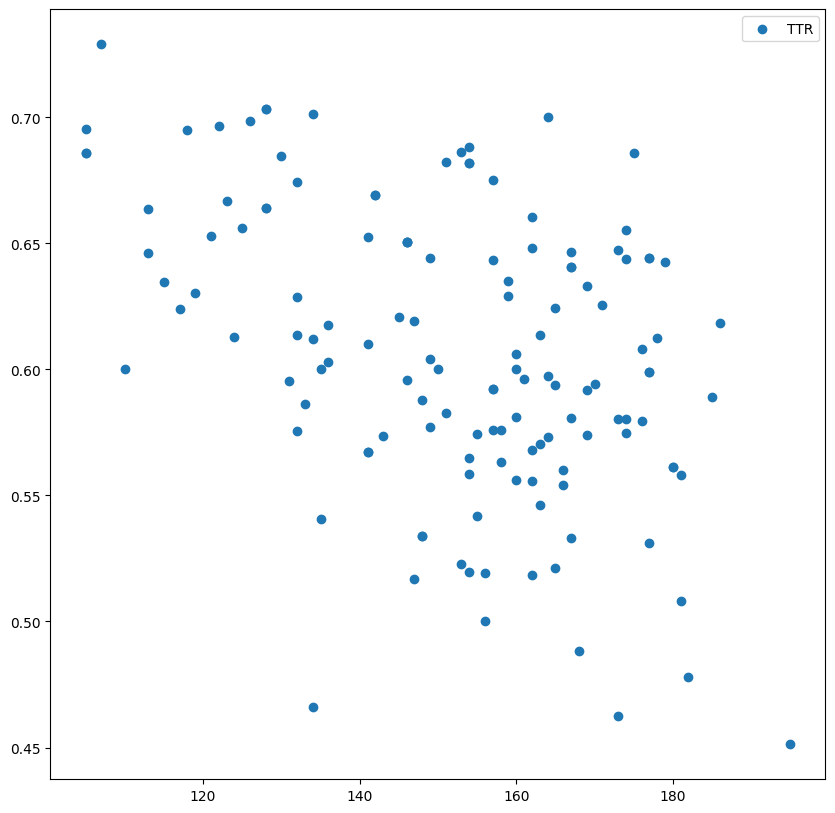

In [21]:
f = plt.figure(figsize=(10, 10))
plt.scatter(df2['N_Splits'],df2['TTR'],  label='TTR')
# plt.scatter(df2['N_Splits'],df2['LogTTR'],  label='LogTTR')
# plt.scatter(df2['N_Splits'],df2['MSTTR'],  label='MSTTR')
plt.legend()

### Linear regression of TTR and Length

In [22]:
# importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

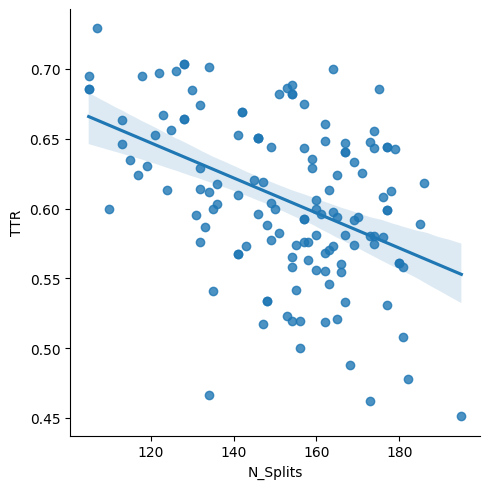

In [23]:
# # f = plt.figure(figsize=(10, 10))
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# data
df = df2

# scatter plot with regression
# line(by default)
sns.lmplot(x ='N_Splits', y ='TTR', data = df)

# Show the plot
plt.show()

<Axes: xlabel='N_Splits', ylabel='TTR'>

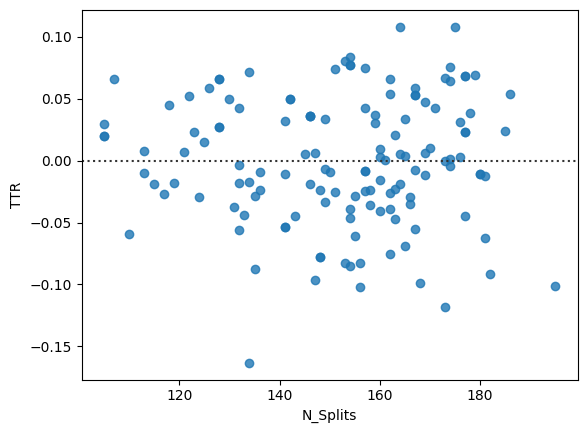

In [24]:
# Residual plots
sns.residplot(x ='N_Splits', y ='TTR', data = df)

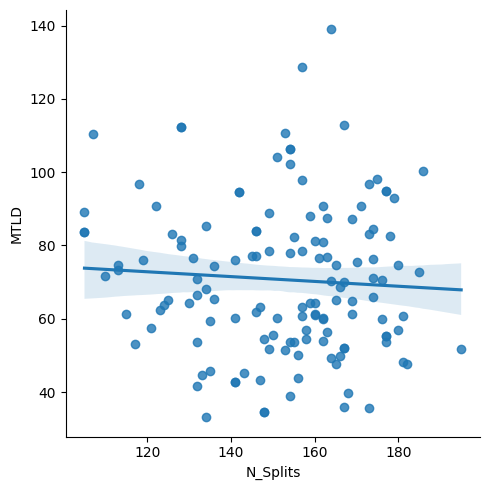

In [25]:
sns.lmplot(x ='N_Splits', y ='MTLD', data = df)

# Show the plot
plt.show()

<Axes: xlabel='N_Splits', ylabel='MTLD'>

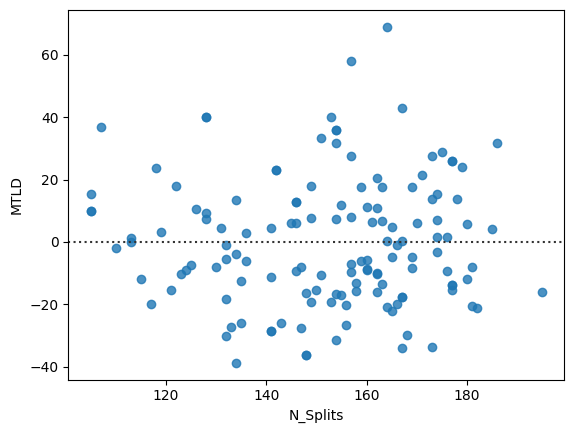

In [26]:
# Residual plots
sns.residplot(x ='N_Splits', y ='MTLD', data = df)

In [27]:
import statsmodels.api as sm

X = df["N_Splits"]
y = df["TTR"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TTR   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              3551.
Date:                Wed, 24 Jan 2024   Prob (F-statistic):                    7.91e-99
Time:                        13:18:51   Log-Likelihood:                          99.282
No. Observations:                 136   AIC:                                     -196.6
Df Residuals:                     135   BIC:                                     -193.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N_Splits       0.0039   6.54e-05     59.591      0.000       0.004       0.004
==============================================================================
Omnibus:                        2.718   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                2.674
Skew:                           0.338   Prob(JB):                        0.263
Kurtosis:                       2.874   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
X = df["N_Splits"]
y = df["MTLD"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MTLD   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              1239.
Date:                Wed, 24 Jan 2024   Prob (F-statistic):                    6.93e-70
Time:                        13:19:10   Log-Likelihood:                         -619.89
No. Observations:                 136   AIC:                                      1242.
Df Residuals:                     135   BIC:                                      1245.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
N_Splits       0.4555      0.013     35.200      0.000       0.430       0.481
==============================================================================
Omnibus:                        4.854   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.949
Skew:                           0.450   Prob(JB):                       0.0842
Kurtosis:                       2.749   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Boxplots

In [29]:
import seaborn as sns
import numpy as np

### Setting the figure size

In [30]:
sns.set(rc={'figure.figsize':(12,8)}) #set width and height

<Axes: xlabel='Year', ylabel='value'>

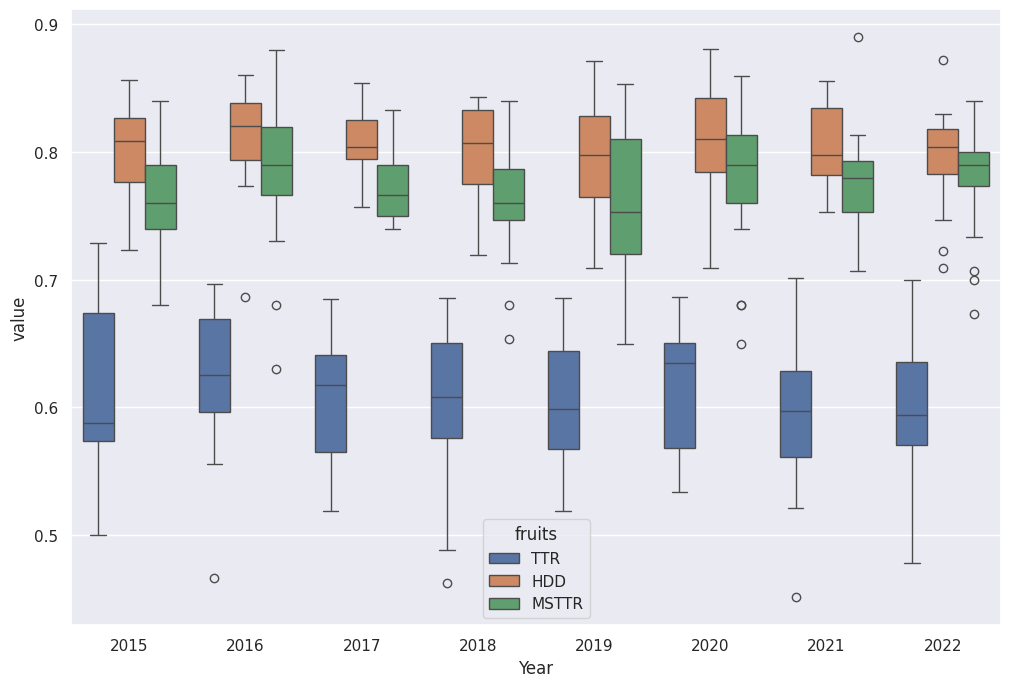

In [31]:
df = df2
df = df[['Year','TTR','MSTTR','HDD','MTLD']]

dd=pd.melt(df,id_vars=['Year'],value_vars=['TTR','HDD','MSTTR'],var_name='fruits')
sns.boxplot(x='Year',y='value',data=dd,hue='fruits')

<ipython-input-32-26e0554af4fb>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( labels_list, rotation=0 )


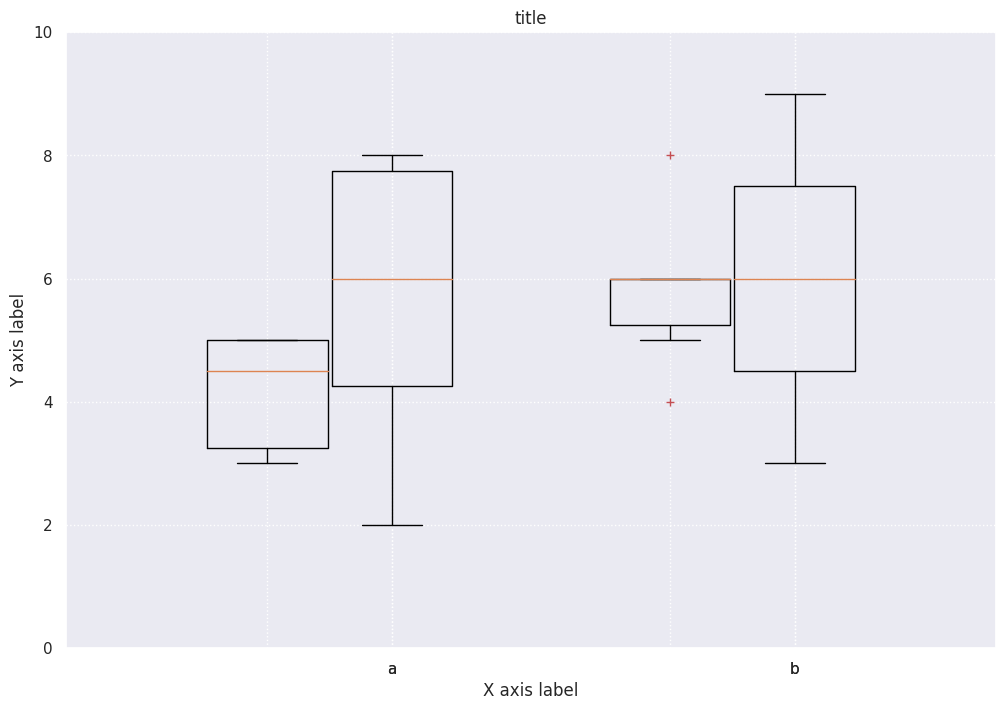

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# --- Your data, e.g. results per algorithm:
data1 = [5,5,4,3,3,5]
data2 = [6,6,4,6,8,5]
data3 = [7,8,4,5,8,2]
data4 = [6,9,3,6,8,4]

# --- Combining your data:
data_group1 = [data1, data2]
data_group2 = [data3, data4]

# --- Labels for your data:
labels_list = ['a','b']
xlocations  = range(len(data_group1))
width       = 0.3
symbol      = 'r+'
ymin        = 0
ymax        = 10

ax = plt.gca()
ax.set_ylim(ymin,ymax)
ax.set_xticklabels( labels_list, rotation=0 )
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks(xlocations)
plt.xlabel('X axis label')
plt.ylabel('Y axis label')
plt.title('title')

# --- Offset the positions per group:
positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

plt.boxplot(data_group1,
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group1,
            widths=width,
#           notch=False,
#           vert=True,
#           whis=1.5,
#           bootstrap=None,
#           usermedians=None,
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.boxplot(data_group2,
            labels=labels_list,
            sym=symbol,
            positions=positions_group2,
            widths=width,
#           notch=False,
#           vert=True,
#           whis=1.5,
#           bootstrap=None,
#           usermedians=None,
#           conf_intervals=None,
#           patch_artist=False,
            )

plt.savefig('boxplot_grouped.png')
plt.savefig('boxplot_grouped.pdf')    # when publishing, use high quality PDFs
#plt.show()                   # uncomment to show the plot.

<Axes: xlabel='Year', ylabel='value'>

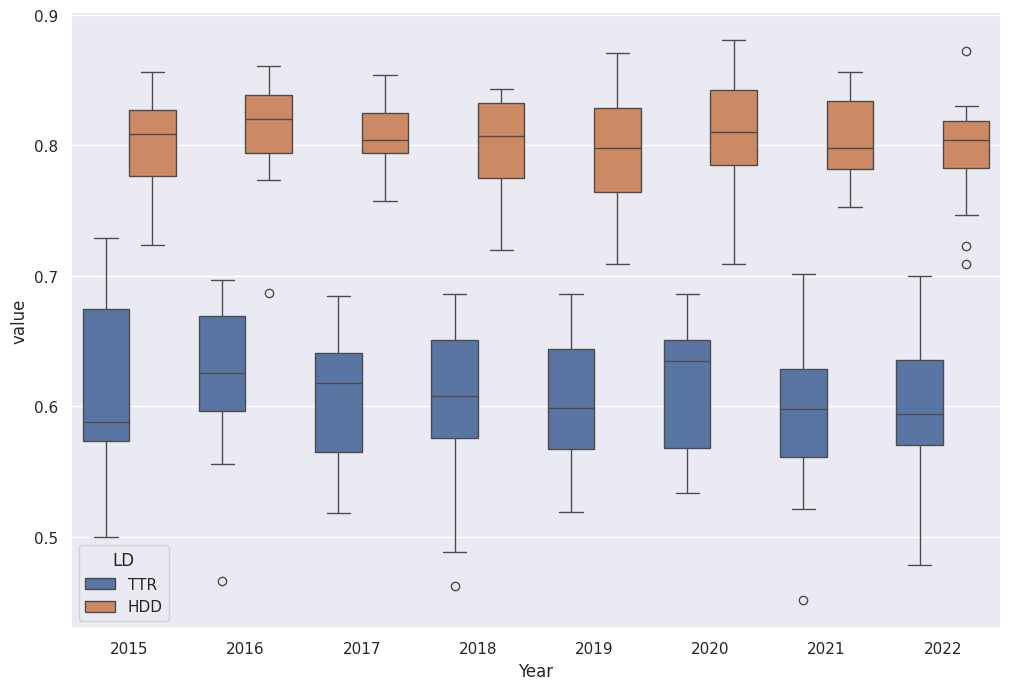

In [35]:
dd = pd.melt(df3, id_vars = ['Year'],value_vars = ['TTR','HDD'],var_name='LD')
sns.boxplot(x = 'Year', y = 'value', data=dd, hue='LD')


### MTLD grouped plots

In [36]:
datatop = df2.tail()
datatop

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid
131,2022,Infer-Logic,Q36,"According to the market response model, it is ...",1035,"[According, to, the, market, response, model,,...",163,"[accord, to, the, market, response, model, it,...",0.570552,7.284322,0.889835,0.049799,0.813333,0.810877,0.803874,87.560227,79.687117,78.402729
132,2022,Infer-Logic,Q37,In spite of the likeness between the fictional...,1025,"[In, spite, of, the, likeness, between, the, f...",167,"[in, spite, of, the, likeness, between, the, f...",0.532934,6.887027,0.877030,0.055324,0.673333,0.690678,0.746895,35.844810,36.263473,35.668548
133,2022,Infer-Logic,Q38,Retraining current employees for new positions...,981,"[Retraining, current, employees, for, new, pos...",155,"[retraining, current, employee, for, new, posi...",0.574194,7.148652,0.889998,0.050222,0.793333,0.783962,0.804126,82.405437,73.432258,64.910794
134,2022,Infer-Logic,Q39,As long as the irrealism of the silent black a...,1068,"[As, long, as, the, irrealism, of, the, silent...",174,"[as, long, as, the, irrealism, of, the, silent...",0.574713,7.580980,0.892638,0.047918,0.773333,0.792000,0.797267,71.008388,69.804598,68.444683
135,2022,Context,Q40,Philip Kitcher and Wesley Salmon have suggeste...,1069,"[Philip, Kitcher, and, Wesley, Salmon, have, s...",154,"[philip, kitcher, and, wesley, salmon, have, s...",0.519481,6.446584,0.869976,0.059439,0.706667,0.688381,0.708912,39.029817,38.831169,34.360697


column names

In [37]:
for col in df2.columns:
    print(col)

Year
Category
QN
Passage
String
Splits
N_Splits
Lemma
TTR
RTTR
LogTTR
MassTTR
MSTTR
MATTR
HDD
MTLD
MTLD_wrap
MTLD_bid


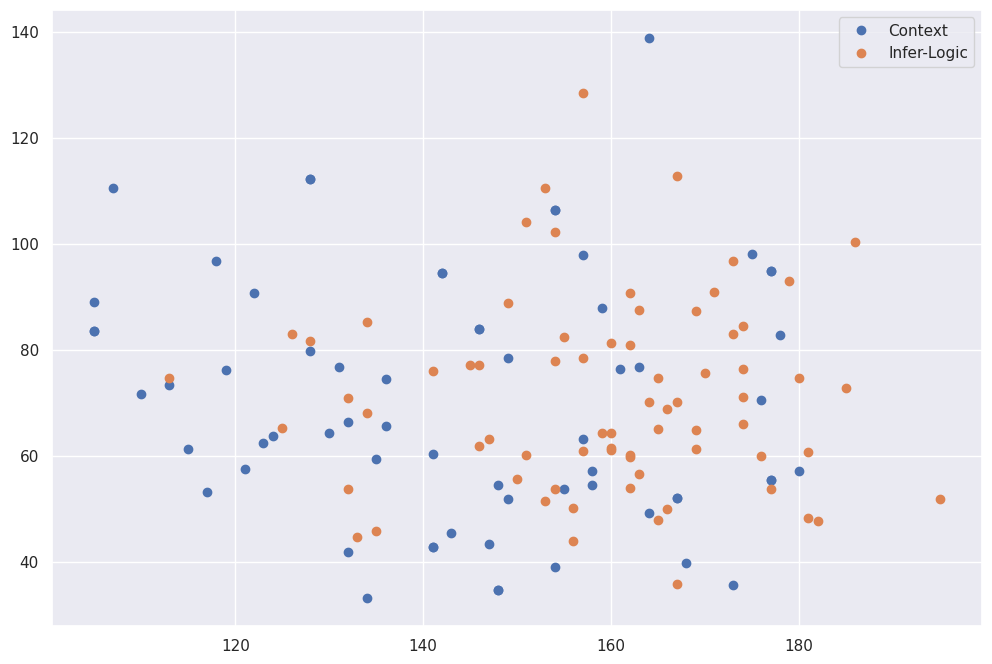

In [38]:
groups = df2.groupby("Category")
for name, group in groups:
    plt.plot(group["N_Splits"], group["MTLD"], marker="o", linestyle="", label=name)
plt.legend()

<ipython-input-39-fa92f7371598>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot("month", "year", "passengers")
<ipython-input-39-fa92f7371598>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot("Year", "QN", "MTLD")


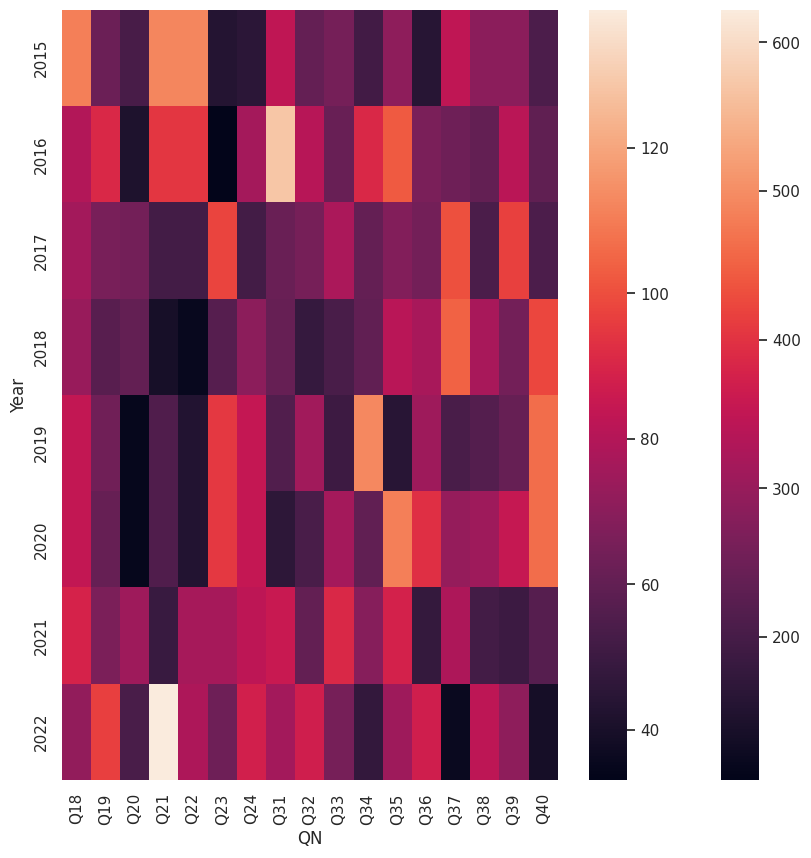

In [39]:
f = plt.figure(figsize=(10, 10))
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

data = df2
data = data.pivot("Year", "QN", "MTLD")
ax = sns.heatmap(data)

In [40]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


In [41]:
df3

,Year,Category,QN,Passage,String,Splits,N_Splits,Lemma,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid
102,2021,Context,Q18,"Dear Friends,\nSeason_s greetings. As some of ...",611,"[Dear, Friends,, Season_s, greetings., As, som...",105,"[dear, friend, season, greeting, as, some, of,...",0.695238,7.124071,0.921894,0.038643,0.790000,0.782500,0.836292,89.071602,75.857143,52.282982
85,2020,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810000,0.766786,0.810360,83.649431,76.466667,62.060588
68,2019,Context,Q18,"Dear Mr. Reese,\nA few days ago, I submitted m...",578,"[Dear, Mr., Reese,, A, few, days, ago,, I, sub...",105,"[dear, mr, reese, a, few, day, ago, i, submit,...",0.685714,7.026481,0.918931,0.040110,0.810000,0.766786,0.810360,83.649431,76.466667,62.060588
0,2015,Context,Q18,One difference between winners and losers is h...,635,"[One, difference, between, winners, and, loser...",107,"[one, difference, between, winner, and, loser,...",0.728972,7.540545,0.932349,0.033336,0.790000,0.794828,0.841506,110.542069,107.811321,0.000000
119,2022,Context,Q18,"Dear Ms. Green,\nMy name is Donna Williams, a ...",637,"[Dear, Ms., Green,, My, name, is, Donna, Willi...",110,"[dear, ms, green, my, name, be, donna, william...",0.600000,6.292853,0.891325,0.053236,0.790000,0.763279,0.782583,71.694409,63.127273,57.933236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2018,Infer-Logic,Q32,How many of the lunches that you ate over the ...,947,"[How, many, of, the, lunches, that, you, ate, ...",181,"[how, many, of, the, lunch, that, you, eat, ov...",0.508287,6.838306,0.869826,0.057658,0.746667,0.753333,0.771927,48.206931,49.364641,51.324233
129,2022,Infer-Logic,Q34,Precision and determinacy are a necessary requ...,1163,"[Precision, and, determinacy, are, a, necessar...",182,"[precision, and, determinacy, be, a, necessary...",0.478022,6.448869,0.858167,0.062756,0.700000,0.687068,0.722811,47.613066,43.840659,38.516117
98,2020,Infer-Logic,Q37,"Traditionally, Kuhn claims, the primary goal o...",1264,"[Traditionally,, Kuhn, claims,, the, primary, ...",185,"[traditionally, kuhn, claim, the, primary, goa...",0.589189,8.013839,0.898664,0.044697,0.833333,0.793971,0.803945,72.822271,68.983784,66.254063
47,2017,Infer-Logic,Q37,Evolution works to maximize the number of desc...,1077,"[Evolution, works, to, maximize, the, number, ...",186,"[evolution, work, to, maximize, the, number, o...",0.618280,8.432209,0.907991,0.040541,0.820000,0.843504,0.846377,100.387122,96.365591,102.975430


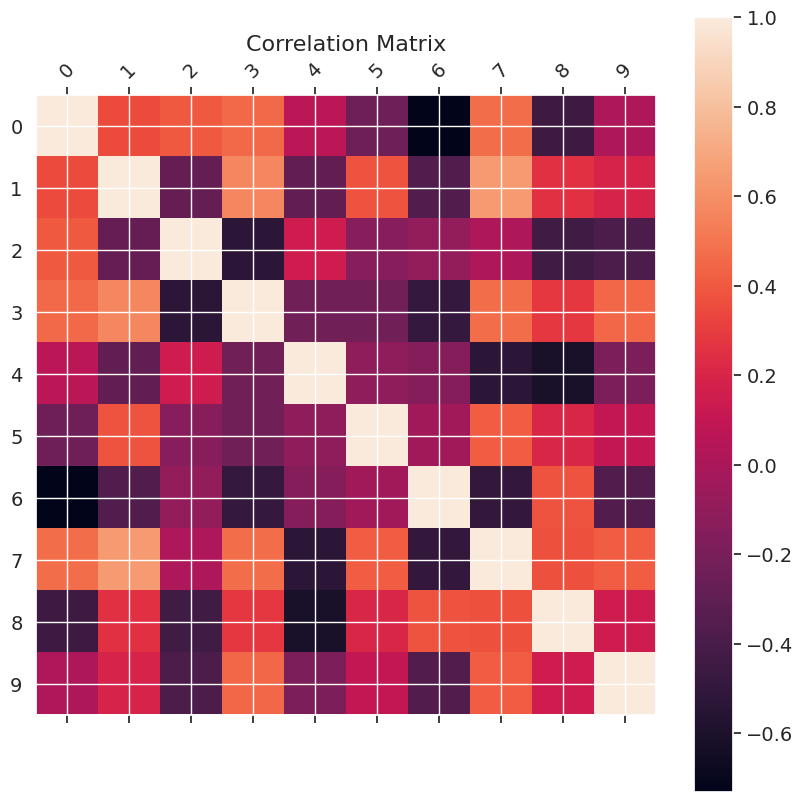

In [42]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [43]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711
5,0.570197,0.438602,0.988374,0.102045,0.208877,0.161310,0.653108,0.253292,0.466311,0.244426
6,0.158970,0.110375,0.656330,0.138183,0.196582,0.368725,0.820993,0.097101,0.837945,0.096098
7,0.976459,0.468651,0.976761,0.604846,0.739264,0.039188,0.282807,0.120197,0.296140,0.118728
8,0.317983,0.414263,0.064147,0.692472,0.566601,0.265389,0.523248,0.093941,0.575946,0.929296
9,0.318569,0.667410,0.131798,0.716327,0.289406,0.183191,0.586513,0.020108,0.828940,0.004695
